# Inspect Agents Performances

`````{margin}
````{dropdown} Necessary imports
```{code-block} python
from copy import deepcopy
import toolz
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from myst_nb import glue

from colosseum import config
from colosseum.agent.mdp_models.bayesian_models import RewardsConjugateModel
from colosseum.agent.mdp_models.bayesian_models import TransitionsConjugateModel
from colosseum.experiment.agent_mdp_interaction import MDPLoop
from colosseum.agent.agents.episodic import QLearningEpisodic, PSRLEpisodic
from colosseum.mdp.river_swim import RiverSwimEpisodic
from colosseum.utils import make_mdp_spec
from colosseum.utils.acme.in_memory_logger import InMemoryLogger
from colosseum.analysis.visualization import plot_MDP_graph
from colosseum.analysis.visualization import plot_MCGraph

sns.set_theme()
config.enable_verbose_logging()
```
````
`````

In [1]:
from copy import deepcopy
import toolz
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from myst_nb import glue

from colosseum import config
from colosseum.agent.mdp_models.bayesian_models import RewardsConjugateModel
from colosseum.agent.mdp_models.bayesian_models import TransitionsConjugateModel
from colosseum.experiment.agent_mdp_interaction import MDPLoop
from colosseum.agent.agents.episodic import QLearningEpisodic, PSRLEpisodic
from colosseum.mdp.river_swim import RiverSwimEpisodic
from colosseum.utils import make_mdp_spec
from colosseum.utils.acme.in_memory_logger import InMemoryLogger
from colosseum.analysis.visualization import plot_MDP_graph
from colosseum.analysis.visualization import plot_MCGraph

sns.set_theme()
config.enable_verbose_logging()

2022-10-23 20:06:14.383251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-23 20:06:14.466953: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2022-10-23 20:06:14.807221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-23 20:06:14.807259: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-10-23 20:06:14.807263: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


{{col}} implements several performance indicators.
After describing them, we report the agent classes and the environment classes implemented in the package.
Then we'll compare the performances of two agents in the same environment, and the performances of an agent across different MDPs.
When comparing across different environments, normalized versions of the indicators should be used to account for transition kernel and reward kernel differences.

<h3>Indicators</h3>

**Reward-based indicators**  
The $\texttt{cumulative_reward}$ measures the empirical cumulative reward the agent obtains while interacting with the MDP.
The $\texttt{cumulative_expected_reward}$ indicator measures the expected average reward for the agent's best policy at fixed intervals and cumulates them.  
**Regret-based indicators**  
The $\texttt{cumulative_regret}$ computes the expected regret for the agent's best policy at a fixed interval and cumulates them.  
**Baseline indicators**  
The $\texttt{cumulative_expected_reward}$ and the $\texttt{cumulative_regret}$ indicators are also available for the uniformly randomly acting policy, the optimal policy, and the worst-performing policy.  
**Computation cost**  
The $\texttt{steps_per_second}$ indicators measures the average number of time steps per second.

The list of indicators can be obtained by calling the [``get_available_indicators``](../pdoc_files/colosseum/experiment/agent_mdp_interaction.html#MDPLoop.get_available_indicators()) function.


<h3>Available agents</h3>

::::{grid} 2
:gutter: 2

:::{grid-item-card} Tabular episodic agents
<a href="../pdoc_files/colosseum/agent/agents/episodic/posterior_sampling.html#PSRLEpisodic">``PSRLEpisodic``</a>  
<a href="../pdoc_files/colosseum/agent/agents/episodic/q_learning.html#QLearningEpisodic">``QLearningEpisodic``</a>  
:::

:::{grid-item-card} Tabular continuous  agents
<a href="../pdoc_files/colosseum/agent/agents/infinite_horizon/posterior_sampling.html#PSRLContinuous">``PSRLContinuous``</a>  
<a href="../pdoc_files/colosseum/agent/agents/infinite_horizon/q_learning.html#QLearningContinuous">``QLearningContinuous``</a>  
<a href="../pdoc_files/colosseum/agent/agents/infinite_horizon/ucrl2.html#UCRL2Continuous">``UCRL2Continuous``</a>
:::

:::{grid-item-card} Non-tabular episodic agents
<a href="../pdoc_files/colosseum/agent/agents/episodic/actor_critic.html#ActorCriticEpisodic">``ActorCriticEpisodic``</a>  
<a href="../pdoc_files/colosseum/agent/agents/episodic/actor_critic_rnn.html#ActorCriticRNNEpisodic">``ActorCriticRNNEpisodic``</a>  
<a href="../pdoc_files/colosseum/agent/agents/episodic/boot_dqn.html#BootDQNEpisodic">``BootDQNEpisodic``</a>  
<a href="../pdoc_files/colosseum/agent/agents/episodic/dqn.html#DQNEpisodic">``DQNEpisodic``</a>  
:::

:::{grid-item-card} Non-tabular continuous agents
<a href="../pdoc_files/colosseum/agent/agents/infinite_horizon/actor_critic.html#ActorCriticContinuous">``ActorCriticContinuous``</a>  
<a href="../pdoc_files/colosseum/agent/agents/infinite_horizon/actor_critic_rnn.html#ActorCriticRNNContinuous">``ActorCriticRNNContinuous``</a>  
<a href="../pdoc_files/colosseum/agent/agents/infinite_horizon/boot_dqn.html#BootDQNContinuous">``BootDQNContinuous``</a>  
<a href="../pdoc_files/colosseum/agent/agents/infinite_horizon/dqn.html#DQNContinuous">``DQNContinuous``</a>  
:::

::::


<h3>Available MDP classes</h3>

````{card}
<a href="../pdoc_files/colosseum/mdp/deep_sea/base.html">``DeepSea``</a>  
<a href="../pdoc_files/colosseum/mdp/frozen_lake/base.html">``FrozenLake``</a>  
<a href="../pdoc_files/colosseum/mdp/minigrid_empty/base.html">``MiniGridEmpty``</a>  
<a href="../pdoc_files/colosseum/mdp/minigrid_rooms/base.html">``MiniGridRooms``</a>  
<a href="../pdoc_files/colosseum/mdp/river_swim/base.html">``RiverSwim``</a>  
<a href="../pdoc_files/colosseum/mdp/simple_grid/base.html">``SimpleGrid``</a>  
<a href="../pdoc_files/colosseum/mdp/taxi/base.html">``Taxi``</a>
````

<h3>Fixed MDP comparison</h3>

We compare `QLearningEpisodic` with `PSRLEpisodic` in `RiverSwimEpisodic` for a total of $20\ 000$ time steps.
As the MDP is fixed, we can compare the performances without necessarily using the normalized versions of the indicators.

In [2]:
seed = 42
optimization_horizon = 20_000
log_every=200

# Instantiate the MDP
mdp = RiverSwimEpisodic(seed=0, size=4, p_rand=0.01)

# Instantiate the agents
q_learning_agent = QLearningEpisodic(
    mdp_specs=make_mdp_spec(mdp),
    seed=seed,
    optimization_horizon=optimization_horizon,
    c_1 = 0.95,
    p = 0.05
)
psrl_agent = PSRLEpisodic(
    mdp_specs=make_mdp_spec(mdp),
    seed=seed,
    optimization_horizon=optimization_horizon,
)

# q-learning  interaction
loop_ql = MDPLoop(mdp, q_learning_agent)
loop_ql.run(T=optimization_horizon, log_every=log_every)

# PSRL interaction
loop_psrl = MDPLoop(mdp, psrl_agent)
loop_psrl.run(T=optimization_horizon, log_every=log_every)

Experiment loop QLearningEpisodic@RiverSwimEpisodic:   0%|                                                                                                      | 0/20000 [00:00<?, ?it/s]

Experiment loop QLearningEpisodic@RiverSwimEpisodic: 100%|████████████████████████████| 20000/20000 [00:00<00:00, 28173.57it/s, is_training=True, Instantaneous normalized regret=5.03e-5]

Experiment loop PSRLEpisodic@RiverSwimEpisodic:   0%|                                                                                                           | 0/20000 [00:00<?, ?it/s]

Experiment loop PSRLEpisodic@RiverSwimEpisodic: 100%|████████████████████████| 20000/20000 [00:00<00:00, 23493.54it/s, is_training=No, optimal at 4200, Instantaneous normalized regret=0]

(-1,
 {'steps': 19999,
  'cumulative_regret': 5.9604644775390625e-06,
  'cumulative_reward': 4897.175,
  'cumulative_expected_reward': 4925.99635720253,
  'normalized_cumulative_regret': 2.4200036045953693e-05,
  'normalized_cumulative_reward': 19882.98260478419,
  'normalized_cumulative_expected_reward': 19999.999975799965,
  'random_cumulative_regret': 4583.808854222298,
  'random_cumulative_expected_reward': 342.1875089406967,
  'random_normalized_cumulative_regret': 18610.68712311847,
  'random_normalized_cumulative_expected_reward': 1389.3128768815302,
  'worst_cumulative_regret': 4925.996363162994,
  'worst_cumulative_expected_reward': 0.0,
  'worst_normalized_cumulative_regret': 20000.0,
  'worst_normalized_cumulative_expected_reward': 0.0,
  'optimal_cumulative_expected_reward': 4925.996363162994,
  'optimal_normalized_cumulative_expected_reward': 20000.0,
  'steps_per_second': 23458.661246424508})

**Cumulative reward**

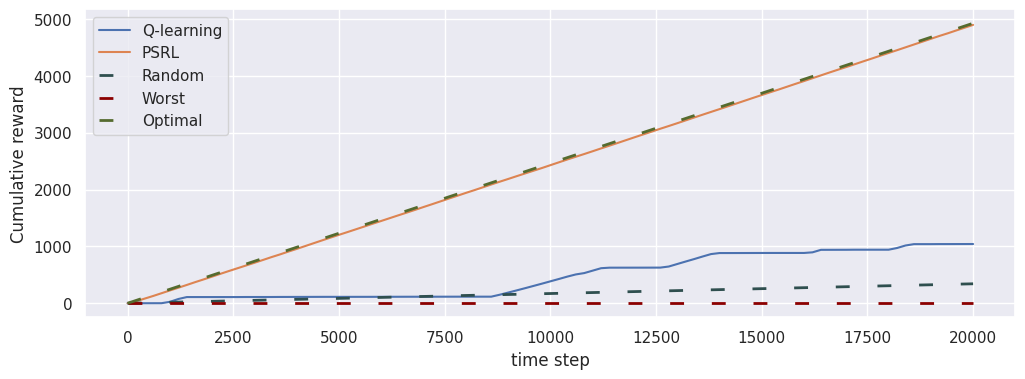

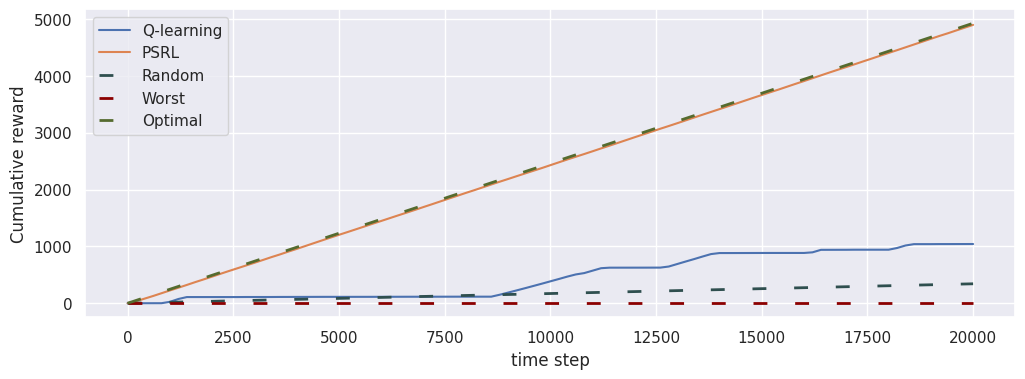

In [3]:
# Create the shared axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# Plot the cumulative reward of the q-learning agent without the baselines
loop_ql.plot("cumulative_reward", ax, baselines=[])

# Plot the cumulative reward of the PSRL agent, including the baselines this time
loop_psrl.plot("cumulative_reward", ax)

# Display the figure
glue("cumulative_reward", fig, display=False)

````{div} full-width
```{glue:figure} cumulative_reward
```
````

**Cumulative expected reward**

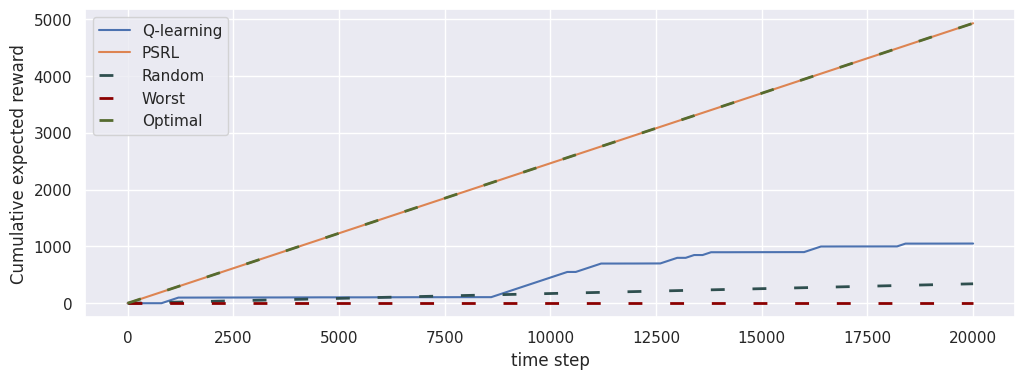

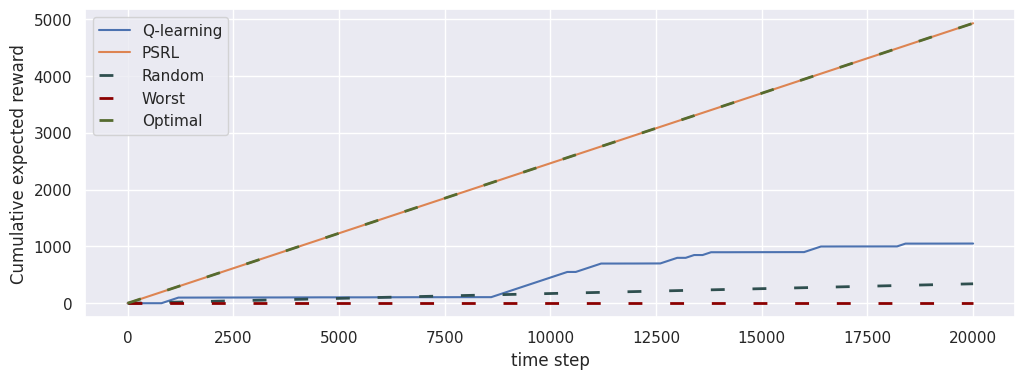

In [4]:
fig1, ax = plt.subplots(1, 1, figsize=(12, 4))
loop_ql.plot("cumulative_expected_reward", ax, baselines=[])
loop_psrl.plot("cumulative_expected_reward", ax)
glue("cumulative_expected_reward", fig1, display=False)

````{div} full-width
```{glue:figure} cumulative_expected_reward
```
````

**Cumulative regret**

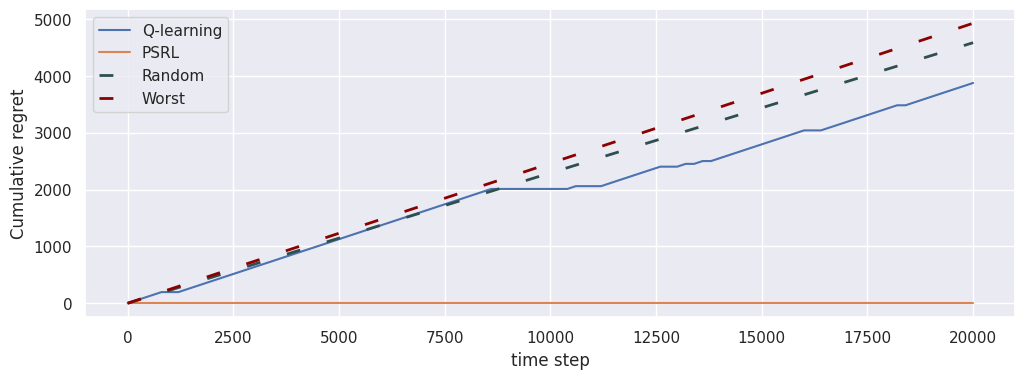

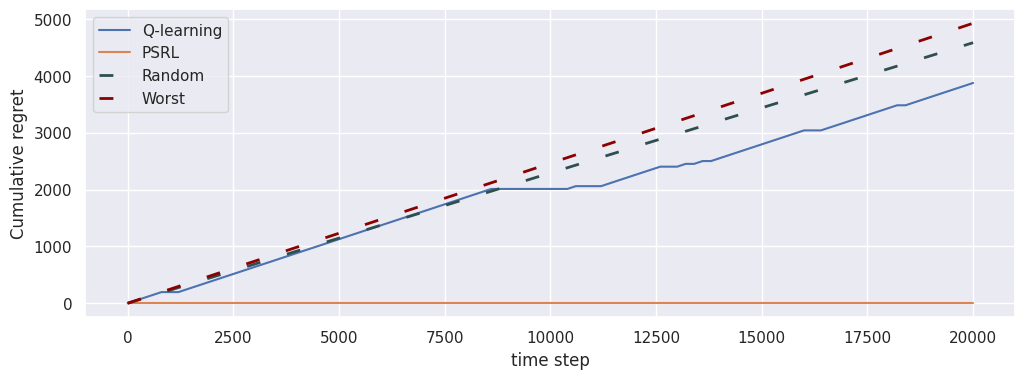

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
loop_ql.plot("cumulative_regret", ax, baselines=[])
loop_psrl.plot("cumulative_regret", ax)
glue("cumulative_regret", fig, display=False)
plt.show()

````{div} full-width
```{glue:figure} cumulative_regret
```
````

**Steps per second**

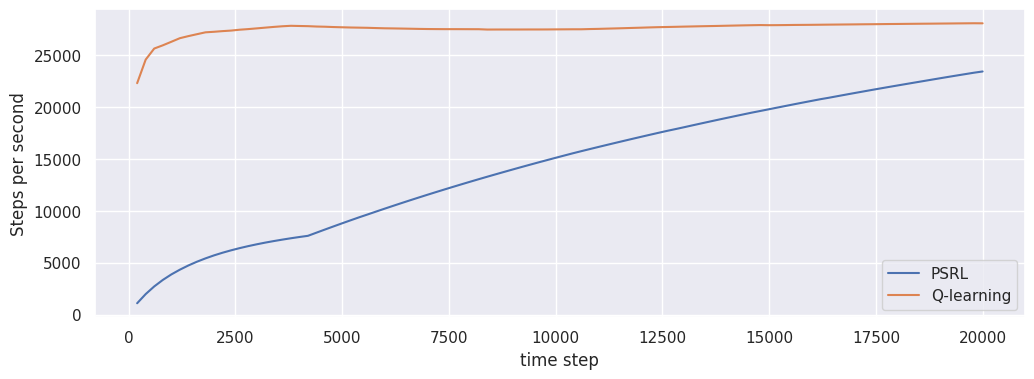

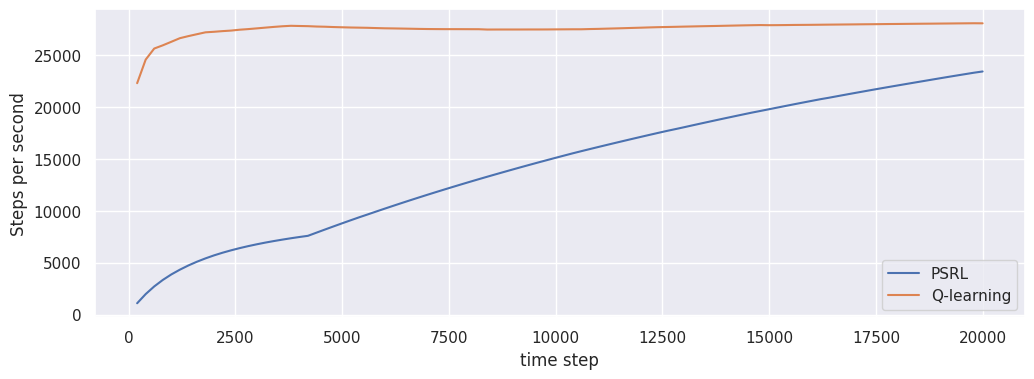

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
loop_psrl.plot("steps_per_second", ax)
loop_ql.plot("steps_per_second", ax)
glue("steps_per_second", fig, display=False)
plt.show()

````{div} full-width
```{glue:figure} steps_per_second
```
````

<h3>Fixed agent class comparison</h3>

We compare `QLearningEpisodic` in two different instances of `RiverSwimEpisodic` for a total of $20\ 000$ time steps.
In this case, the use of the normalized versions of the indicators.

In [7]:
seed = 42
optimization_horizon = 20_000

# Instantiate the MDPs
mdp_short = RiverSwimEpisodic(seed=0, size=4, p_rand=0.01)
mdo_long = RiverSwimEpisodic(seed=0, size=10, p_rand=0.01)

# Instantiate the agent
agent_for_short = QLearningEpisodic(
    mdp_specs=make_mdp_spec(mdp_short),
    seed=seed,
    optimization_horizon=optimization_horizon,
    c_1 = 0.95,
    p = 0.05
)
agent_for_long = QLearningEpisodic(
    mdp_specs=make_mdp_spec(mdo_long),
    seed=seed,
    optimization_horizon=2000,
    c_1 = 0.95,
    p = 0.05
)

# Short Riverswim interaction
loop_short = MDPLoop(mdp_short, agent_for_short)
loop_short.run(T=optimization_horizon, log_every=200)

# Long Riverswim interaction
loop_long = MDPLoop(mdo_long, agent_for_long)
loop_long.run(T=optimization_horizon, log_every=200)

Experiment loop QLearningEpisodic@RiverSwimEpisodic:   0%|                                                                                                      | 0/20000 [00:00<?, ?it/s]

Experiment loop QLearningEpisodic@RiverSwimEpisodic: 100%|████████████████████████████| 20000/20000 [00:00<00:00, 28221.27it/s, is_training=True, Instantaneous normalized regret=5.03e-5]

Experiment loop QLearningEpisodic@RiverSwimEpisodic:   0%|                                                                                                      | 0/20000 [00:00<?, ?it/s]

Experiment loop QLearningEpisodic@RiverSwimEpisodic: 100%|████████████████████████████| 20000/20000 [00:00<00:00, 28772.01it/s, is_training=True, Instantaneous normalized regret=5.05e-5]

(-1,
 {'steps': 19999,
  'cumulative_regret': 1912.162219285965,
  'cumulative_reward': 1.03,
  'cumulative_expected_reward': 1.0480104689486325,
  'normalized_cumulative_regret': 19989.044032243146,
  'normalized_cumulative_reward': 10.76724304326996,
  'normalized_cumulative_expected_reward': 10.955517894234225,
  'random_cumulative_regret': 1890.4173038899899,
  'random_cumulative_expected_reward': 22.792968899011612,
  'random_normalized_cumulative_regret': 19761.730644841406,
  'random_normalized_cumulative_expected_reward': 238.26935515859353,
  'worst_cumulative_regret': 1913.2102727890015,
  'worst_cumulative_expected_reward': 0.0,
  'worst_normalized_cumulative_regret': 20000.0,
  'worst_normalized_cumulative_expected_reward': 0.0,
  'optimal_cumulative_expected_reward': 1913.2102727890015,
  'optimal_normalized_cumulative_expected_reward': 20000.0,
  'steps_per_second': 28726.250160014766})

**Normalized cumulative reward**

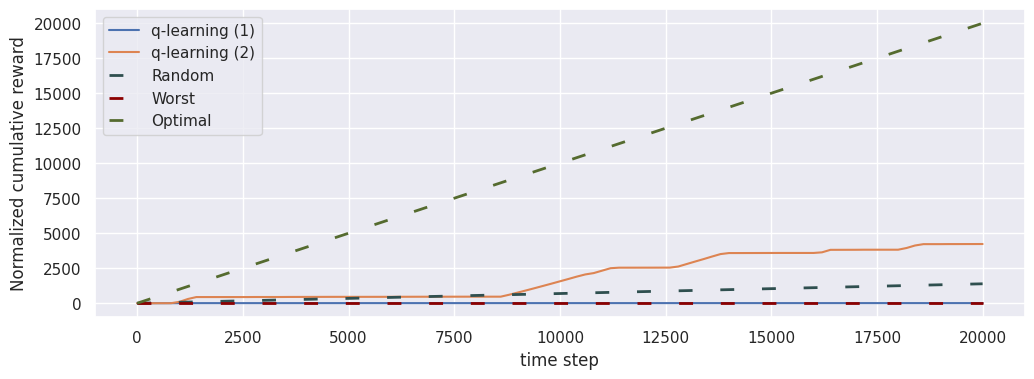

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
loop_long.plot("normalized_cumulative_reward", ax, label="q-learning (1)", baselines=[])
loop_short.plot("normalized_cumulative_reward", ax, label="q-learning (2)")
glue("normalized_cumulative_reward", fig, display=False)
plt.close()

````{div} full-width
```{glue:figure} normalized_cumulative_reward
```
````

**Normalized cumulative expected reward**

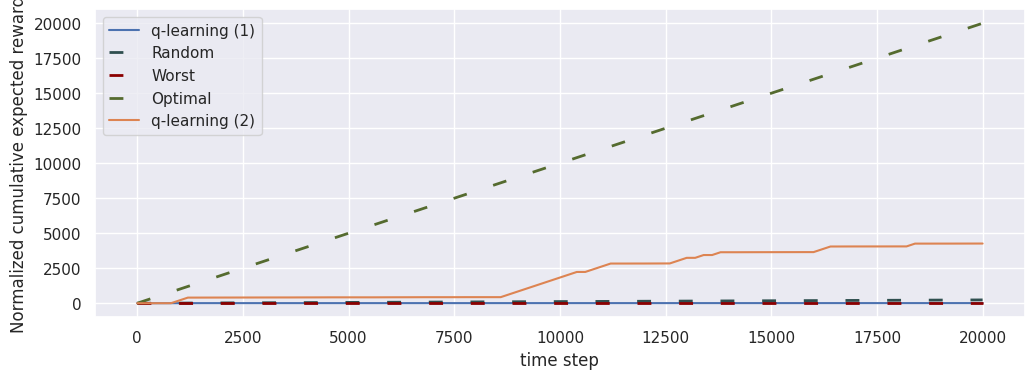

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
loop_long.plot("normalized_cumulative_expected_reward", ax, label="q-learning (1)")
loop_short.plot("normalized_cumulative_expected_reward", ax, label="q-learning (2)", baselines=[])
glue("normalized_cumulative_expected_reward", fig, display=False)
plt.close()

````{div} full-width
```{glue:figure} normalized_cumulative_expected_reward
```
````

**Normalized cumulative regret**

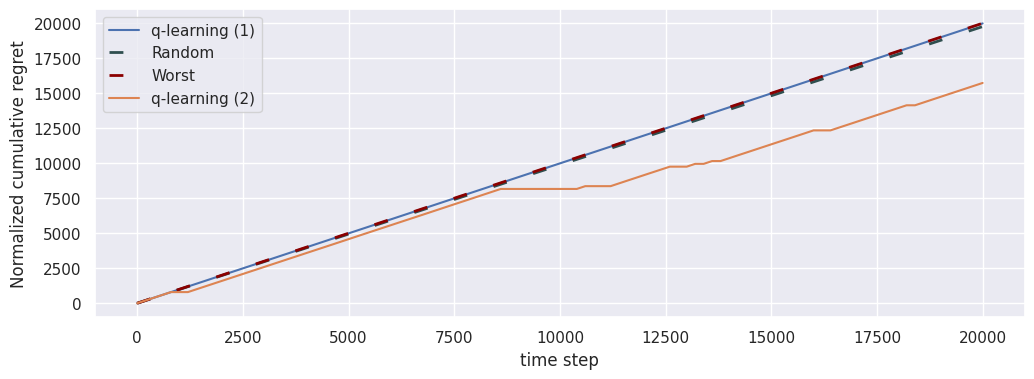

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
loop_long.plot("normalized_cumulative_regret", ax, label="q-learning (1)")
loop_short.plot("normalized_cumulative_regret", ax, label="q-learning (2)", baselines=[])
glue("normalized_cumulative_regret", fig, display=False)
plt.close()

````{div} full-width
```{glue:figure} normalized_cumulative_regret
```
````

**Steps per second**

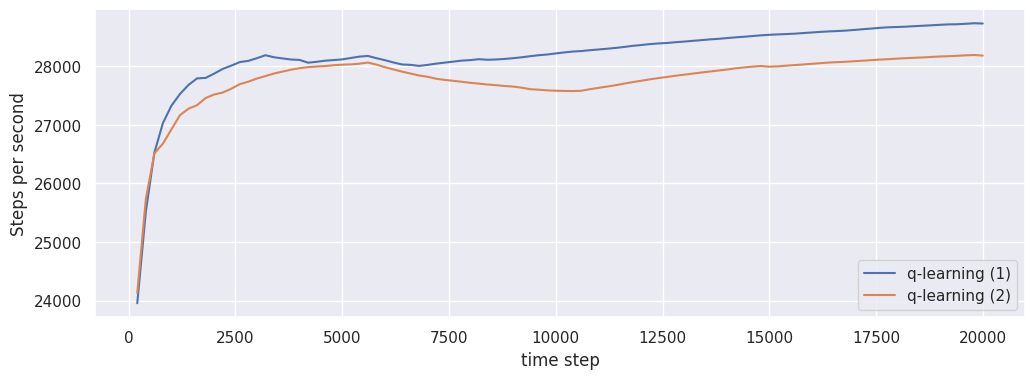

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
loop_long.plot("steps_per_second", ax, label="q-learning (1)")
loop_short.plot("steps_per_second", ax, label="q-learning (2)")
glue("normalized_steps_per_second", fig, display=False)
plt.close()

````{div} full-width
```{glue:figure} normalized_steps_per_second
```
````